<a href="https://colab.research.google.com/github/Arash-Kamboj/Online-Retail-Customer-Churn-Project/blob/main/Online_Retail_Customer_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Loading and Overview**

The analysis begin by loading the dataset "online_retail_customer_churn.csv" into a Pandas DataFrame and then display the first few rows of the DataFrame to provide an initial overview of the data's structure and content.


---



In [2]:
from google.colab import files
files.upload()

Saving online_retail_customer_churn.csv to online_retail_customer_churn.csv


{'online_retail_customer_churn.csv': b'Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn\n1,62,Other,45.15,5892.58,5,22,453.8,2,0,3,129,True,Responded,True\n2,65,Male,79.51,9025.47,13,77,22.9,2,2,3,227,False,Responded,False\n3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True\n4,21,Other,79.63,9110.3,3,33,411.83,5,3,5,226,True,Ignored,True\n5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False\n6,57,Male,190.43,255.19,19,85,417.78,5,1,4,130,False,Unsubscribed,False\n7,27,Male,172.13,3512.55,3,77,316.18,0,3,1,61,True,Unsubscribed,False\n8,37,Other,88.9,7270.9,4,87,63.61,3,4,3,224,False,Ignored,False\n9,39,Other,24.46,4935.49,1,21,173.8,9,2,4,126,True,Responded,True\n10,68,Other,169.59,9803.57,17,34,481.18,6,1,2,171,True,Unsubscribed,False\n11,54,Male,138.9,4283.84,15,33,

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/online_retail_customer_churn.csv')
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


2. Summary of the Dataset

To ensure data integrity, we perform a thorough data quality check.


---



In [4]:
print('Data types and missing values:')
print(df.info())

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Pro

3. Descriptive Statistics:

In this step, To gain insights into the dataset's numerical features, we calculate summary statistics for numeric columns.


---



In [50]:
print("Summary statistics for numeric columns:")
df.describe()

Summary statistics for numeric columns:


,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


4. Count Number of Unique Values:

Understanding the diversity and uniqueness of categorical variables is essential for event planning and engagement strategies. Analyze the results to understand the variety of responses and preferences among residents.


---



In [51]:
print('\nCount Number of Unique Values:')
print(df.nunique())


Count Number of Unique Values:
Customer_ID                   1000
Age                             52
Gender                           3
Annual_Income                  972
Total_Spend                   1000
Years_as_Customer               19
Num_of_Purchases                99
Average_Transaction_Amount     988
Num_of_Returns                  10
Num_of_Support_Contacts          5
Satisfaction_Score               5
Last_Purchase_Days_Ago         337
Email_Opt_In                     2
Promotion_Response               3
Target_Churn                     2
dtype: int64


In [7]:
for i in df.columns:
  print(f"\nCheck unique values in {i} column:")
  print( print(df[i].unique()))


Check unique values in Customer_ID column:
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  1

6. Checking for Missing Values:

Identify and report missing values in the dataset, which may require data imputation or further data collection strategies.


---



In [8]:
print("\nMissing values count in each column:")
df.isnull().sum()



Missing values count in each column:


Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

7. Check for Duplicate Values:

One important aspect of data quality is identifying and handling duplicated data. Utilise the duplicated() method in pandas to check for duplicated rows within the dataset. The sum() function is then applied to count the total number of duplicated rows. Duplicated data can introduce bias and inaccuracies into our analysis, so it's essential to address it appropriately.


---



In [9]:
print(f"Duplicate values count in the Dataframe: {df.duplicated().sum()}")

Duplicate values count in the Dataframe: 0


Since the data is completely clean. There are no missing or duplicated values to handle and also there are no unnecessary columns to drop of. So, I can further start with my data analysis.


---



Gender with highest number of purchases.


---



In [12]:
purchase_counts = df.groupby('Gender')['Num_of_Purchases'].sum()

# Find the gender with the highest number of purchases
gender_with_highest_purchases = purchase_counts.idxmax()

print("Gender with the highest number of purchases:", gender_with_highest_purchases)
print("Total number of purchases:", purchase_counts.max())

Gender with the highest number of purchases: Female
Total number of purchases: 17010


Total purchases on the basis of gender and its visual representation.


---



In [13]:
purchase_counts = df.groupby('Gender')['Num_of_Purchases'].sum()
purchase_counts

Gender
Female    17010
Male      16905
Other     15541
Name: Num_of_Purchases, dtype: int64

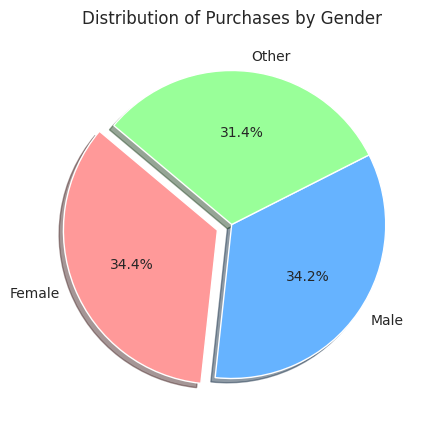

Result: Although its a female dominated market but the difference in purchases made by other genders is not huge.


In [34]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Distribution of Purchases by Gender')
plt.show()

print("\033[1mResult: Although its a female dominated market but the difference in purchases made by other genders is not huge.\033[0m")

Age based purchase counts.

---



In [44]:
purchase_count2 = df.groupby('Age')['Num_of_Purchases'].sum()
print(f"Age based purchase counts:\n {purchase_count2}")

Age based purchase counts:
 Age
18    1134
19     867
20     659
21    1515
22     652
23    1367
24    1067
25     967
26     633
27     932
28     935
29     728
30     914
31     888
32     638
33    1001
34     978
35     887
36     913
37    1022
38    1096
39     864
40     837
41    1069
42    1005
43     856
44    1012
45    1088
46     890
47    1062
48    1139
49     563
50     994
51     988
52    1153
53    1321
54     941
55     806
56    1011
57     774
58     880
59    1000
60     557
61    1064
62     731
63    1127
64    1233
65     637
66     974
67     798
68    1154
69    1135
Name: Num_of_Purchases, dtype: int64


Who is the highest purchaser based on Age of the customer?


---



In [49]:
purchase_count2 = df.groupby('Age')['Num_of_Purchases'].sum()

# Find the gender with the highest number of purchases
age_with_highest_purchases = purchase_count2.idxmax()

print("Age group with the highest number of purchases:", age_with_highest_purchases)
print("Total number of purchases:", purchase_count2.max())

Age group with the highest number of purchases: 21
Total number of purchases: 1515


Top 5 age groups with highest number of purchases.


---



In [46]:
top_5_age_groups = purchase_count2.sort_values(ascending=False).head(5)
print(f"Top 5 age groups with highest number of purchases.\n {top_5_age_groups}")

Top 5 age groups with highest number of purchases.
 Age
21    1515
23    1367
53    1321
64    1233
68    1154
Name: Num_of_Purchases, dtype: int64


Visual presentation of top 5 age groups.

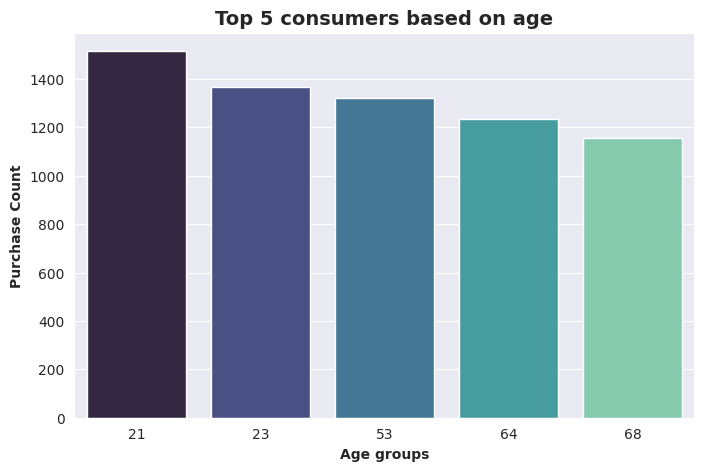

In [48]:
# Create a bar plot to visualize the distribution
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(top_5_age_groups, palette='mako')
plt.title('Top 5 consumers based on age', fontsize=14, fontweight='bold')
plt.xlabel('Age groups', fontweight='bold')
plt.ylabel('Purchase Count', fontweight='bold')
plt.show()

